In [58]:
# Artificial Neural Network

In [9]:
# Part 1 - Data Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Importing the dataset
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Data\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
# Manging data
df.drop('RowNumber',axis=1,inplace=True)
df.drop('CustomerId',axis=1,inplace=True)
df.drop('Surname',axis=1,inplace=True)

In [19]:
#Creating dummy variable
geography=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [21]:
#joinining the dummy variable
df=pd.concat((df,geography,gender),axis=1)

In [27]:
#delete the old record
df2=df.drop(['Geography','Gender'],axis=1)
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
#Selecting the train and test data
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [41]:
(X_train).shape

(8000, 11)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [59]:
#Training data set O/P
X_train = sc.fit_transform(X_train)
X_train

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [60]:
#Testing data set O/P
X_test = sc.transform(X_test)
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
# Part 2 - Now let's make the ANN!

In [35]:
# Importing the Keras libraries and packages
import keras

Using TensorFlow backend.


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [37]:
# Initialising the ANN
classifier=Sequential()

In [39]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

In [42]:
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [43]:
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [46]:
# Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\Lenovo\.conda\envs\tensorflow 3.6\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 5359 samples, validate on 2641 samples
Epoch 1/100





5359/5359 [==============================] - 3s 494us/step - loss: 0.5251 - acc: 0.7722 - val_loss: 0.4710 - val_acc: 0.7948
Epoch 2/100
5359/5359 [==============================] - 1s 239us/step - loss: 0.4488 - acc: 0.8018 - val_loss: 0.4432 - val_acc: 0.7989
Epoch 3/100
5359/5359 [==============================] - 1s 252us/step - loss: 0.4295 - acc: 0.7998 - val_loss: 0.4305 - val_acc: 0.8001
Epoch 4/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.4160 - acc: 0.8052 - val_loss: 0.4182 - val_acc: 0.8035
Epoch 5/100
5359/5359 [==============================] - 1s 238us/step - loss: 0.4012 - acc: 0.8173 - val_loss: 0.4046 - val_acc: 0.8152
Epoch 6/100
5359/5359 [==============================] - 1s 234us/step - loss: 0.3852 - acc: 0.8322 - val_loss: 0.3935 - val_acc: 0.8311
Epoch 7/100
5359/5359 [==============================] - 1s 234us/step - loss: 0.3721 - acc: 0.8427 - val_loss: 0.3854 - v

5359/5359 [==============================] - 1s 267us/step - loss: 0.3293 - acc: 0.8619 - val_loss: 0.3568 - val_acc: 0.8622
Epoch 48/100
5359/5359 [==============================] - 1s 246us/step - loss: 0.3291 - acc: 0.8651 - val_loss: 0.3585 - val_acc: 0.8607
Epoch 49/100
5359/5359 [==============================] - 1s 242us/step - loss: 0.3285 - acc: 0.8638 - val_loss: 0.3597 - val_acc: 0.8595
Epoch 50/100
5359/5359 [==============================] - 1s 225us/step - loss: 0.3283 - acc: 0.8630 - val_loss: 0.3605 - val_acc: 0.8599
Epoch 51/100
5359/5359 [==============================] - 1s 226us/step - loss: 0.3286 - acc: 0.8643 - val_loss: 0.3586 - val_acc: 0.8607
Epoch 52/100
5359/5359 [==============================] - 1s 234us/step - loss: 0.3278 - acc: 0.8627 - val_loss: 0.3586 - val_acc: 0.8595
Epoch 53/100
5359/5359 [==============================] - 1s 255us/step - loss: 0.3275 - acc: 0.8621 - val_loss: 0.3593 - val_acc: 0.8580
Epoch 54/100
5359/5359 [=======================

In [48]:
# list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


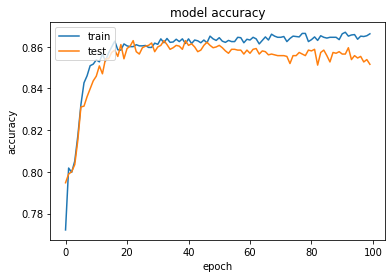

In [49]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

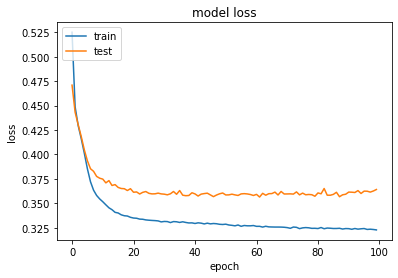

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

In [52]:
# Predicting the Test set results
pred = classifier.predict(X_test)
pred = (pred > 0.5)
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

       False       0.92      0.89      0.91      1645
        True       0.57      0.65      0.61       355

    accuracy                           0.85      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.86      0.85      0.86      2000

[[1472  173]
 [ 123  232]]


In [57]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(pred,y_test)
score

0.852